In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [76]:
X_full = pd.read_csv('C:/Users/Amrita/Downloads/train_missing.csv')
y_full=X_full['336']
# X_full = X_full.iloc[:,:320]

In [6]:
X_full.describe()

,1,2,3,4,5,6,7,8,9,10,...,311,312,313,314,315,316,317,318,319,320
count,118.000000,111.000000,118.000000,117.000000,118.000000,117.000000,117.000000,116.000000,118.000000,118.000000,...,115.000000,114.000000,113.000000,112.000000,113.000000,114.000000,115.000000,114.000000,114.000000,113.000000
mean,55.185281,29.455170,20.133406,11.717620,2.993431,53.381037,24.885578,16.370685,9.382809,2.421047,...,71.814372,29.461537,13.319688,7.111695,1.940363,73.562945,34.154276,21.282041,13.119030,3.569019
std,231.560417,113.888649,66.761260,41.485160,10.873634,228.222888,106.578281,63.103625,36.955305,9.623271,...,238.738558,114.382187,43.470488,20.822510,5.854187,267.356278,128.076592,64.394238,35.914947,10.650898
min,13.520177,7.294909,5.114145,2.716812,0.683786,13.659985,6.781815,4.884976,2.381677,0.596756,...,14.018089,8.129298,3.405693,1.295693,0.305692,0.557981,0.330827,0.190830,0.122986,0.042489
25%,27.471604,13.321046,9.176017,4.895681,1.226039,25.955351,11.434120,7.240858,4.100984,1.010620,...,33.860138,13.916421,5.509955,2.485094,0.691444,34.699305,14.473267,7.514763,4.609414,1.257856
50%,31.660357,16.546044,11.222496,6.445126,1.591307,30.768973,13.875011,9.346645,5.015651,1.253747,...,48.193232,17.937364,7.470878,3.874196,1.062115,46.251366,19.682280,11.095825,6.698555,1.860810
75%,39.000463,21.153362,16.107317,9.651667,2.516279,37.186191,16.758496,11.685362,6.886485,1.835904,...,61.560633,22.559706,10.156298,5.673645,1.566547,60.571041,25.039033,17.794866,12.428814,3.195361
max,2546.749671,1214.754048,733.098788,453.808170,119.451712,2498.566002,1166.302125,687.439698,405.860794,105.663967,...,2601.011002,1237.629298,465.247473,220.470008,62.374444,2892.278644,1388.652081,686.325212,381.176452,113.776845


In [77]:
X_full

,1,2,3,4,5,6,7,8,9,10,...,327,328,329,330,331,332,333,334,335,336
0,31.129865,NaN,12.552049,7.068057,1.770791,28.017433,NaN,9.517853,5.719088,1.562840,...,23.706621,38.308528,23.535511,4.929119,NaN,NaN,NaN,NaN,NaN,0
1,48.577287,18.493233,9.397648,4.131432,0.972074,49.677388,18.172435,8.170672,3.223989,0.786527,...,7.575514,3.771178,2.323433,0.715189,NaN,NaN,NaN,NaN,NaN,0
2,26.061153,23.225411,25.723749,14.884328,4.038577,24.090571,10.826693,8.282939,5.146213,1.354670,...,9.987452,6.705134,4.723092,1.499256,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,10.933662,NaN,3.284630,0.811420,...,7.626116,5.363644,3.681968,1.071472,NaN,NaN,NaN,NaN,NaN,0
4,29.305121,14.182968,9.653328,4.866074,1.060786,26.002981,12.317876,7.787859,3.716648,0.769699,...,12.204365,7.324385,4.086232,1.092821,NaN,NaN,NaN,NaN,NaN,0
5,38.995820,NaN,11.963245,7.607854,2.069165,37.793226,13.492341,8.776891,5.462053,1.456734,...,13.162686,10.649259,8.727974,2.958811,56.130382,23.910953,21.655355,9.129612,1.639368,0
6,47.082047,NaN,9.918954,4.759272,1.086857,47.083063,18.166118,9.780790,4.707011,NaN,...,12.198953,7.823974,5.359804,1.750588,NaN,NaN,NaN,NaN,NaN,0
7,33.184368,NaN,7.287613,5.066192,1.649748,31.021442,11.230133,6.652336,4.472617,1.388447,...,19.660675,13.747168,8.736864,2.834163,337.646261,215.885988,62.950147,11.983954,2.729297,0
8,23.605893,NaN,9.162950,4.979217,1.234509,22.608354,10.788170,NaN,3.922094,1.008376,...,11.738542,9.783699,6.996942,2.330825,NaN,NaN,NaN,NaN,NaN,0
9,42.601520,17.368207,12.184888,6.298886,1.423508,41.746428,13.943528,7.546273,3.763081,0.899921,...,10.701359,7.116376,4.369460,1.239405,NaN,NaN,NaN,NaN,NaN,0


In [78]:
y_full

0      0
1      0
2      0
3      0
4      0
      ..
114    1
115    1
116    1
117    1
118    1
Name: 336, Length: 119, dtype: int64

In [79]:
X_full.drop(X_full.iloc[:, 320:], axis=1, inplace=True)
X_full['320']

0      2.675583
1      1.699983
2      1.059246
3      1.575780
4      1.160344
         ...   
114    7.295363
115    0.968902
116    3.342441
117    1.109698
118    1.850416
Name: 320, Length: 119, dtype: float64

1      0.84
2      6.72
3      0.84
4      1.68
5      0.84
       ... 
316    4.20
317    3.36
318    4.20
319    4.20
320    5.04
Length: 320, dtype: float64


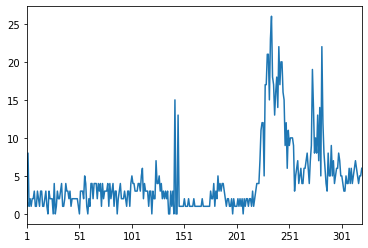

In [80]:
print (X_full.isna().mean().round(4) * 100)
X_full.isnull().sum().plot(kind='line')

In [81]:
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, train_size=0.8, test_size=0.2,random_state=66)
final_imputer = SimpleImputer(strategy='median')
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train.replace("\\",'0')))
final_X_valid = pd.DataFrame(final_imputer.transform(X_valid))
final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns



In [83]:
final_X = pd.DataFrame(final_imputer.fit_transform(X_full.replace("\\",'0')))
final_X.columns=X_full.columns

In [84]:
rmse_val = [] #to store rmse values for different k
for K in range(1,20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(final_X_train, y_train)  #fit the model
    pred=model.predict(final_X_valid) #make prediction on test set
    error = sqrt(mean_squared_error(y_valid,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  2 is: 0.568257570707744
RMSE value for k=  3 is: 0.5527707983925667
RMSE value for k=  4 is: 0.5327796605226842
RMSE value for k=  5 is: 0.5016638981097471
RMSE value for k=  6 is: 0.4976798018658033
RMSE value for k=  7 is: 0.48181205582971576
RMSE value for k=  8 is: 0.4947642536265799
RMSE value for k=  9 is: 0.47031204071112204
RMSE value for k=  10 is: 0.4609772228646444
RMSE value for k=  11 is: 0.4553024000399005
RMSE value for k=  12 is: 0.4452033451340168
RMSE value for k=  13 is: 0.44356009979503064
RMSE value for k=  14 is: 0.4420018622794517
RMSE value for k=  15 is: 0.4455541701280761
RMSE value for k=  16 is: 0.45857001464698205
RMSE value for k=  17 is: 0.47211761285625514
RMSE value for k=  18 is: 0.47763779172329374
RMSE value for k=  19 is: 0.49675772402693924
RMSE value for k=  20 is: 0.4933938588997637


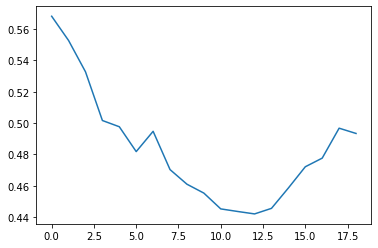

In [85]:
plt.plot(rmse_val)

In [10]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250,500,750,1000],
    "max_depth":[2,4,8,10,15,16,32,None],
    "random_state":[2,5,10,15,20,25,30,45,47,65,70]
}
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(final_X_train,y_train)
cv.best_params_

{'max_depth': 4, 'n_estimators': 10, 'random_state': 30}

In [50]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
display(cv)

Best parameters are: {'max_depth': 4, 'n_estimators': 100, 'random_state': 25}


0.547 + or -0.061 for the {'max_depth': 2, 'n_estimators': 5, 'random_state': 2}
0.579 + or -0.073 for the {'max_depth': 2, 'n_estimators': 5, 'random_state': 5}
0.547 + or -0.069 for the {'max_depth': 2, 'n_estimators': 5, 'random_state': 10}
0.547 + or -0.096 for the {'max_depth': 2, 'n_estimators': 5, 'random_state': 15}
0.568 + or -0.042 for the {'max_depth': 2, 'n_estimators': 5, 'random_state': 20}
0.558 + or -0.112 for the {'max_depth': 2, 'n_estimators': 5, 'random_state': 25}
0.526 + or -0.114 for the {'max_depth': 2, 'n_estimators': 5, 'random_state': 30}
0.6 + or -0.093 for the {'max_depth': 2, 'n_estimators': 5, 'random_state': 45}
0.547 + or -0.089 for the {'max_depth': 2, 'n_estimators': 5, 'random_state': 47}
0.526 + or -0.137 for the {'max_depth': 2, 'n_estimators': 5, 'random_state': 65}
0.516 + or -0.132 for the {'max_depth': 2, 'n_estimators': 5, 'random_state': 70}
0.537 + or -0.054 for

Random Forest Accuracy on Test Set: 79.17%


C:\Users\Amrita\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Accuracy on Test Set: 83.33%
KNN Accuracy on Test Set: 83.33%
Decision Tree Accuracy on Test Set: 83.33%


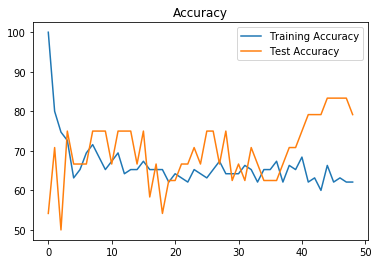

In [86]:


#Random Forest
rf=RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=50)
rf.fit(final_X_train,y_train)
print("Random Forest Accuracy on Test Set: {:.2f}%".format(rf.score(final_X_valid,y_valid)*100))

#SVM
svc=SVC(C=350,kernel='sigmoid')
svc.fit(final_X_train,y_train)
print("SVM Accuracy on Test Set: {:.2f}%".format(svc.score(final_X_valid,y_valid)*100))

#KNN
l=[]
l1=[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(final_X_train, y_train)
    l1.append(knn.score(final_X_train, y_train)*100)
    l.append(knn.score(final_X_valid, y_valid)*100)
print("KNN Accuracy on Test Set: {:.2f}%".format(max(l)))
plt.plot(l1,label='Training Accuracy')
plt.plot(l,label='Test Accuracy ')
plt.title("Accuracy")
plt.legend()


#Decision Tree
tree = DecisionTreeClassifier(criterion='entropy',max_depth=25,min_samples_split=100,random_state=66)
tree.fit(final_X_train, y_train)
print("Decision Tree Accuracy on Test Set: {:.2f}%".format(tree.score(final_X_valid, y_valid)*100))


In [17]:
import xgboost

xgb=xgboost.XGBClassifier( n_estimators=100, max_depth=10, gamma=10 )
xgb.fit(final_X_train,y_train)
print(" Accuracy on Test Set: {:.2f}%".format(xgb.score(final_X_valid, y_valid)*100))



 Accuracy on Test Set: 83.33%


In [19]:
from sklearn.metrics import mean_absolute_error
val_predictions = knn.predict(final_X_valid)
val_mae = mean_absolute_error(val_predictions, y_valid)
print("Validation MAE for best value of max_leaf_nodes: {:,.2f}".format(val_mae))


Validation MAE for best value of max_leaf_nodes: 0.21


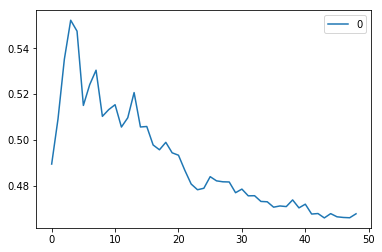

In [92]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()